# ULTIMATE TECHNOLOGIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_json(r"C:\Users\Servet\Desktop\logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Let's check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#resampling df to 15-minute intervals
df_logins = df.resample("15min", on="login_time").count()

#cleaning up df
df_logins.index.name = "idx"
df_logins.reset_index(inplace=True)
df_logins.rename({"login_time":"logins"}, axis=1, inplace=True)

#show
df_logins.head()

,idx,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


We extract the hour and day components from the datetime object. We also identify whether the timestamp correspond to day or night (using AM vs. PM).

In [6]:
#extracting hours and days
df_logins["hour"] = df_logins["idx"].dt.hour
df_logins["day"] = df_logins["idx"].dt.day_name()

#giving AM/PM labels
day_or_night = lambda row: "AM" if row in range(0,12) else "PM"
df_logins["AM-PM"] = df_logins["hour"].apply(day_or_night)

#show
display(df_logins.head())

,idx,logins,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


Since the logins are aggregated by count, we can group entries that occurred in the same day of the week and aggregate them by summation.
We can also get the average daily login per day of the week using mean.

In [7]:
#getting total logins per day of week
df_day = df_logins.groupby("day").sum()[["logins"]]

#getting average daily logins per day of week
df_day["daily_avg"] = df_logins.groupby("day").mean()[["logins"]]

#show
display(df_day)

,logins,daily_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


We can also identify at what time the most logins occur by identifying the hourly_avg across all days.

In [8]:
#getting total logins per hour
df_hour = df_logins.groupby("hour").sum()[["logins"]]

#getting average hourly logins per hour of day
df_hour["hourly_avg"] = df_logins.groupby("hour").mean()[["logins"]]

#show
display(df_hour)

,logins,hourly_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


To get a better understanding of data, the df_total takes into account day and night hours per week of day.


In [9]:
#aggregating by sum
df_total = df_logins.groupby(["day", "AM-PM"]).sum()[["logins"]]

#aggregating by mean
df_total["total_avg"] = df_logins.groupby(["day", "AM-PM"]).mean()[["logins"]]

#show
display(df_total)

logins  total_avg
day       AM-PM                   
Friday    AM       5924   8.227778
          PM       9284  12.894444
Monday    AM       3905   5.423611
          PM       4918   7.025714
Saturday  AM      10217  14.190278
          PM       9160  12.722222
Sunday    AM      10351  14.376389
          PM       7816  10.855556
Thursday  AM       5153   7.668155
          PM       6807   9.893895
Tuesday   AM       3961   5.894345
          PM       5307   7.897321
Wednesday AM       4570   6.800595
          PM       5769   8.584821

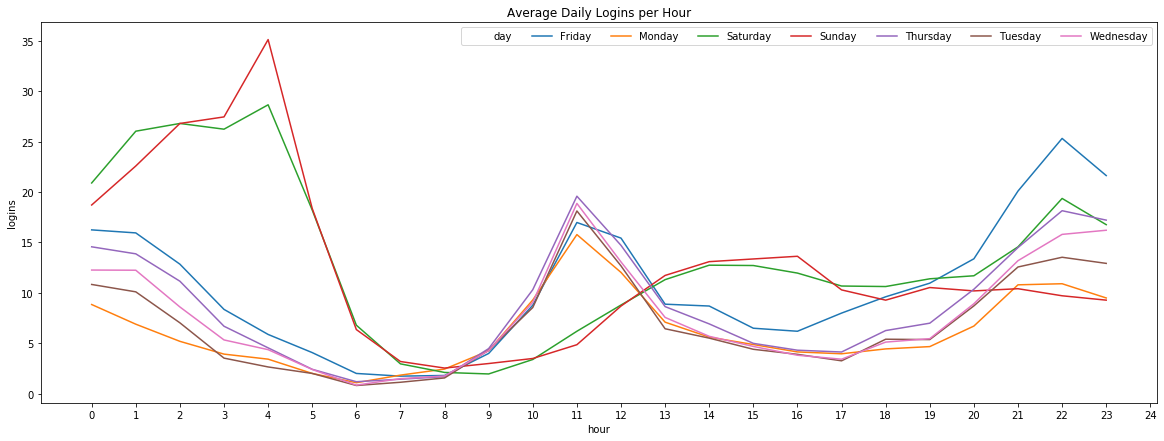

In [10]:
#getting average daily logins per hour
df_total = df_logins.groupby(["hour", "day"]).mean().reset_index()

#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="hour", y="logins", data=df_total, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Average Daily Logins per Hour")
plt.xticks(range(0,25))

#display plot
plt.show()

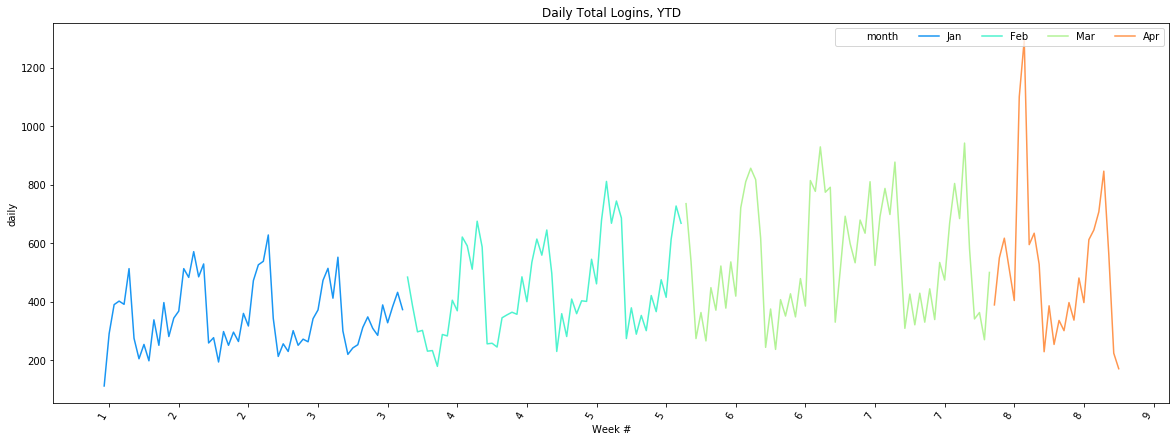

In [11]:
import matplotlib.dates as mdates

#resampling df to daily intervals
df_daily = df.resample("12H", on="login_time").count()

#cleaning up df
df_daily.index.name = "idx"
df_daily.reset_index(inplace=True)
df_daily.rename({"login_time":"daily"}, axis=1, inplace=True)

#extracting months
df_daily["month"] = df_daily["idx"].dt.month
df_daily["month"] = df_daily["month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr"})

#plotting df
f, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="idx", y="daily", data=df_daily, hue="month", palette="rainbow")
ax.legend(loc="upper right", ncol=5)
ax.set(title="Daily Total Logins, YTD", xlabel="Week #")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.set_xticklabels(labels=df_daily["idx"].dt.day, \
                   rotation=60, ha="right")

#display plot
plt.show()

# Answer to Part 2

We can compare pre-toll vs. post-toll ridership using A/B testing. If drivers being exclusive to one city really affects business then it must be because of lack of supply, extending the waiting times for riders and driving the cost higher as well. We can then use these characteristics as the metric as basis for comparison:

1) Compare daily average wait times (time driver arrives vs. time rider sends request) in either city prior to the change and after
2) Compare daily average price during rush hour (dollar per mile cost that includes surge pricing due to demand) prior to the change and after
3) Compare daily rate of denied service (i.e. how many times users are turned down for being too far) prior to the change and after

These parameters can simply be extracted from the internal database before and after the implementation of the reimbursement program. The hypothesis testing will be done on each of the three metrics above. Using the first item, average wait times, as an example, the null hypothesis would be that the difference between the two means will be zero (or that they are equal).

Now, since the statistic is daily, we can use a timeframe (say, 20 days) in which each day is a trial of the experiment -- so it will be 20 days during without reimbursement period, compared with 20 days during with reimbursement period. This will ensure randomness as long as this sample is not more than 10% of the actual length of the period (so the program must go on for at least 200 days).

From there, we can simulate the assumption of our null hypothesis by shuffling the labels of our means (half of the sample is randomly assigned as have occurred with reimbursement). Let's say that the target for the average wait time is a 10-second improvement -- our observed test statistic. The p-value is then the probability that a user waited 10-seconds less than when there was no reimbursement in these randomized circumstances. If this event happens less frequently than 5% of the time, then we know it's unlikely to occur. And so encountering a difference of 10-seconds waiting time is considered to be statistically significant.

If we disprove the null hypothesis (the status quo) for all the three metrics, then we have proven that the reimbursement program works. The next step then is to contrast the cost of the total reimbursements against the gains in revenue. And as contingency, also work out the impact of reverting back to the unsubsidized approach.

# ANSWER TO PART 3

In [12]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

The df is created from the JSON dataset and the dates are parsed so they're easily workable.

In [13]:
import json

#save file to memory
file = open("ultimate_data_challenge.json", "r")
dataset = file.read()
file.close()

#load file as JSON
data = json.loads(dataset)

#create df from JSON dataset
df = pd.DataFrame(data)

#parse dates
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
df["signup_date"] = pd.to_datetime(df["signup_date"])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


A user is considered active when a user takes at least one trip during its first 30 days. The active series is created from this logic.

In [14]:
active = lambda row: 1 if row != 0 else 0
df["active"] = df["trips_in_first_30_days"].apply(active)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


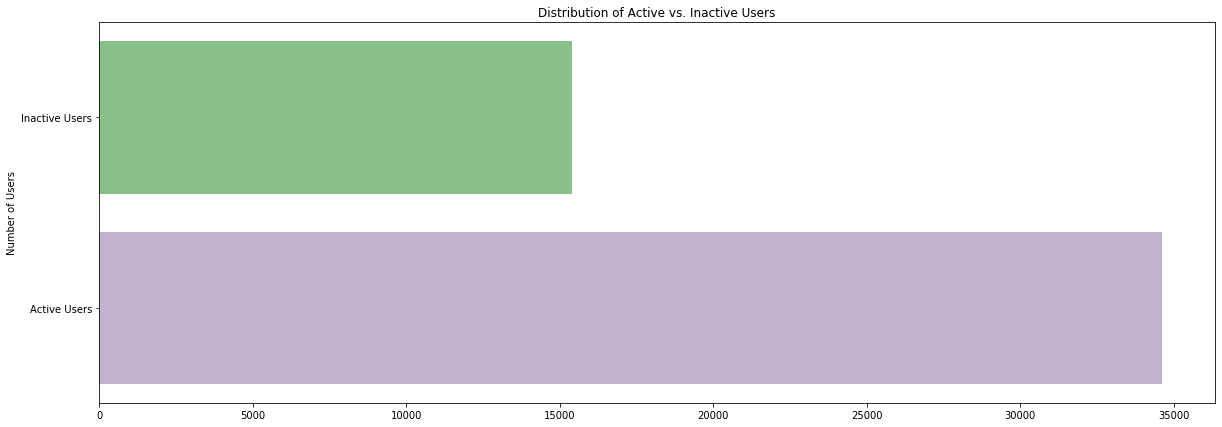

In [15]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(y=df["active"], palette="Accent")
ax.set(title="Distribution of Active vs. Inactive Users", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Inactive Users", "Active Users"])
plt.show()

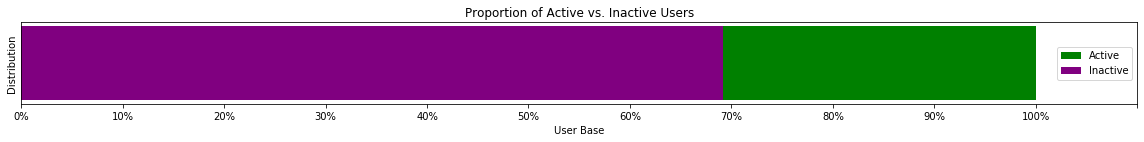

In [16]:
#active user stats
active_count = len(df[df["active"] == 1])
active_pct = active_count/len(df) * 100

#inactive user stats
inactive_count = len(df[df["active"] == 0])
inactive_pct = inactive_count/len(df) * 100

f, axes = plt.subplots(figsize=(20,1.5))

#stacked bar plot
plt.barh(y=0, width=inactive_pct, left=active_pct, color="green")
plt.barh(y=0, width=active_pct, color="purple")

#plot characteristics
plt.title("Proportion of Active vs. Inactive Users")
plt.xlabel("User Base")
plt.ylabel("Distribution")
plt.xticks(ticks = range(0, 111, 10), \
           labels = [str(i)+"%" for i in range(0, 101, 10)])
plt.yticks(ticks = [])
plt.legend(["Active", "Inactive"], loc="center right")

plt.show()

In order to predict if a user will retain in its sixth month, we first create the sixth_month_active column by getting the delta between the last_trip_date and the signup_date. If the result is higher than 30 * 5, then that user is definitely a user that has retained in their sixth month.

In [17]:
from datetime import timedelta

sixth_month_active = lambda row: 1 if \
                      row["last_trip_date"] - row["signup_date"] \
                      > timedelta(days=30*5) \
                      else 0

df["sixth_month_active"] = df.apply(sixth_month_active, axis=1)

df[["signup_date", "last_trip_date", "sixth_month_active"]].head()

,signup_date,last_trip_date,sixth_month_active
0,2014-01-25,2014-06-17,0
1,2014-01-29,2014-05-05,0
2,2014-01-06,2014-01-07,0
3,2014-01-10,2014-06-29,1
4,2014-01-27,2014-03-15,0


To simplify our df we get rid of datetime columns and keep only the continuous and numeric series.

In [18]:
df = df.drop(columns = ["last_trip_date", "signup_date"])
print(df.isna().any())

city                      False
trips_in_first_30_days    False
avg_rating_of_driver       True
avg_surge                 False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
active                    False
sixth_month_active        False
dtype: bool


In [19]:
#replace avg_rating_by_driver NaNs with mean
mean = df["avg_rating_by_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].apply(rating)

#replace avg_rating_of_driver NaNs with mean
mean = df["avg_rating_of_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].apply(rating)

The series for the type of phone used to login on the app also contains NaNs. We simply categorize all the NaN values as Other since the NaN could either mean an unclassified phone or simply unrecognized.

In [20]:
other = lambda row: "Other" if type(row) != str else row
df["phone"] = df["phone"].apply(other)

print(df["phone"].unique())

['iPhone' 'Android' 'Other']


The tabulation below tells us that we've gotten rid of the NaN values in every column:

In [21]:
print(df.isna().any())

city                      False
trips_in_first_30_days    False
avg_rating_of_driver      False
avg_surge                 False
phone                     False
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
active                    False
sixth_month_active        False
dtype: bool


To complete the preprocessing of our df, the following were performed:

1) From bool, the ultimate_black_user was instead mapped to 0 and 1.

2) The ultimate_black_user and active columns were converted to category types for computation speed.

In [22]:
#preprocessing
df["ultimate_black_user"] = df["ultimate_black_user"].map({False:0, True:1}).astype("category")
df["active"] = df["active"].astype("category")
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,sixth_month_active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,1,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,1,0


And now we split the data. The predictor X contains all the features while the target y corresponds to the sixth_month_active retention column.

In [23]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

display(X_train.head())
display(y_train.head())

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
28521,Winterfell,11,4.5,1.00,iPhone,0.0,0,48.6,2.06,4.7,1
45679,King's Landing,1,5.0,1.10,iPhone,6.5,1,90.3,3.26,4.9,1
33494,Winterfell,0,4.0,1.00,iPhone,0.0,1,50.0,3.10,4.5,0
37673,Astapor,0,5.0,1.00,Android,0.0,0,100.0,30.48,5.0,0
11486,Winterfell,0,5.0,1.38,iPhone,50.0,0,0.0,3.93,5.0,0


28521    1
45679    1
33494    0
37673    0
11486    0
Name: sixth_month_active, dtype: int64

We build a scikit-learn pipeline by first having two pipelines: the steps for continuous features, and the steps for discrete features.
    
The numeric_transformer simply scales the features so the magnitudes are relative.

The categorical_transformer performs one-hot encoding on the categorical columns.

After the preprocessing stages, the two pipelines diverge and get fed to the Random Forest classifier.

This entire pipeline is finally incorporated into Grid Search cross-validation.

In [26]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [27]:
#pipeline for numeric features
numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", \
                    "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

#pipeline for categorical features
categorical_features = ["city", "phone", "ultimate_black_user", "active"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

#divernce of the pipelines
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features), \
                  ("cat", categorical_transformer, categorical_features)])

#incorporating the random forest estimator
pipeline = Pipeline(steps=[("pre", preprocessor), \
                           ("rf", RandomForestClassifier(random_state = 38))])

#grid search parameters
params = {"rf__n_estimators" : [75, 100, 150],
          "rf__max_depth" : [5, 10, 15]}

#fitting the pipeline to the grid search
cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

print(cv)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                                 

In [28]:
print(f"Best parameters: {cv.best_params_}")
print(f"Training accuracy score from tuned model: \
       {cv.best_score_*100:.1f}%")

Best parameters: {'rf__max_depth': 5, 'rf__n_estimators': 150}
Training accuracy score from tuned model:        79.5%


The tuned model is finally deployed to our testing set. For the metrics, we make use of accuracy in terms of classification and F1 score to take account false positives and false negatives. Our score is comparable to our training set score, meaning we have not overfitted.

In [29]:
from sklearn import metrics

y_pred = cv.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1_score = metrics.f1_score(y_test, y_pred)

print(f"Model accuracy: {test_accuracy*100:.2f}%")
print(f"Model F1 Score: {test_f1_score:.2f}")

Model accuracy: 79.02%
Model F1 Score: 0.42


We extract feature importance to get a better understanding of what goes behind the scenes on our model. The weights are then associated with their corresponding features.

In [30]:
pipeline.fit(X_train, y_train)

fe = pipeline.named_steps['rf'].feature_importances_

print(fe)

[0.28426172 0.1060607  0.0962607  0.07851516 0.09737183 0.07443575
 0.14920736 0.0153253  0.02227965 0.00989037 0.01206476 0.00115845
 0.01516331 0.01197183 0.01197027 0.00710932 0.00695353]


In [31]:
#replicating numeric_transformer of our pipeline
num_cols = df[numeric_features].columns
num_cols = num_cols.tolist()

#replicating categorical_transformer of our pipeline
cat_cols = pd.get_dummies(df[categorical_features]).columns
cat_cols = cat_cols.tolist()

#the column names are added together
cols = num_cols + cat_cols

#the column names are finally tied to our fe list
feature_importance = zip(cols, fe)
feature_importance = sorted(feature_importance, key=lambda x:x[1], reverse=True)

for i, j in feature_importance:
    print(f"Weight: {j:.3f} | Feature: {i}")

Weight: 0.284 | Feature: avg_dist
Weight: 0.149 | Feature: weekday_pct
Weight: 0.106 | Feature: avg_rating_by_driver
Weight: 0.097 | Feature: surge_pct
Weight: 0.096 | Feature: avg_rating_of_driver
Weight: 0.079 | Feature: avg_surge
Weight: 0.074 | Feature: trips_in_first_30_days
Weight: 0.022 | Feature: city_King's Landing
Weight: 0.015 | Feature: city_Astapor
Weight: 0.015 | Feature: phone_iPhone
Weight: 0.012 | Feature: phone_Android
Weight: 0.012 | Feature: ultimate_black_user_0
Weight: 0.012 | Feature: ultimate_black_user_1
Weight: 0.010 | Feature: city_Winterfell
Weight: 0.007 | Feature: active_0
Weight: 0.007 | Feature: active_1
Weight: 0.001 | Feature: phone_Other
